In [1]:
import pandas as pd
import numpy as np
import datetime,os
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
os.chdir("/home/chandrakantachaudhury/Desktop/HACKTHON/thinkdata")

In [3]:
%matplotlib inline

In [4]:
crime_df_org=pd.read_csv("Crimes_-_2001_to_present.csv")


getting copy of original dataframe 

In [5]:
crime_df=crime_df_org.copy()

checking data shape (rows and columns)

In [7]:
crime_df.shape

(6799799, 22)

sample records from dataframe 

In [7]:
crime_df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"


In [8]:
crime_df.tail(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6799797,11583786,JC132741,12/25/2018 08:00:00 PM,010XX E 90TH ST,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,STREET,False,False,...,8.0,47.0,07,NaN,NaN,2018,02/03/2019 04:01:10 PM,NaN,NaN,NaN
6799798,11583826,JC138122,01/20/2019 03:00:00 PM,087XX S BLACKSTONE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,8.0,48.0,14,NaN,NaN,2019,02/03/2019 04:01:10 PM,NaN,NaN,NaN


changing date to pandas date time format

In [8]:
crime_df.Date=pd.to_datetime(crime_df.Date,format='%m/%d/%Y %I:%M:%S %p')

In [10]:
crime_df.tail(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6799797,11583786,JC132741,2018-12-25 20:00:00,010XX E 90TH ST,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,STREET,False,False,...,8.0,47.0,07,NaN,NaN,2018,02/03/2019 04:01:10 PM,NaN,NaN,NaN
6799798,11583826,JC138122,2019-01-20 15:00:00,087XX S BLACKSTONE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,8.0,48.0,14,NaN,NaN,2019,02/03/2019 04:01:10 PM,NaN,NaN,NaN


converting months numeric values to categories

1- jan , 2- feb  etc...

In [9]:
crime_df['month']=(crime_df['Date'].dt.month).apply(lambda x:calendar.month_abbr[x])

In [10]:
crime_df["weekday"]=crime_df['Date'].dt.weekday_name

#remove the year 2019 as it has only few records

In [11]:
crime_df=crime_df[crime_df['Year'] !=2019]


# EDA part

plotting crime rate per year 

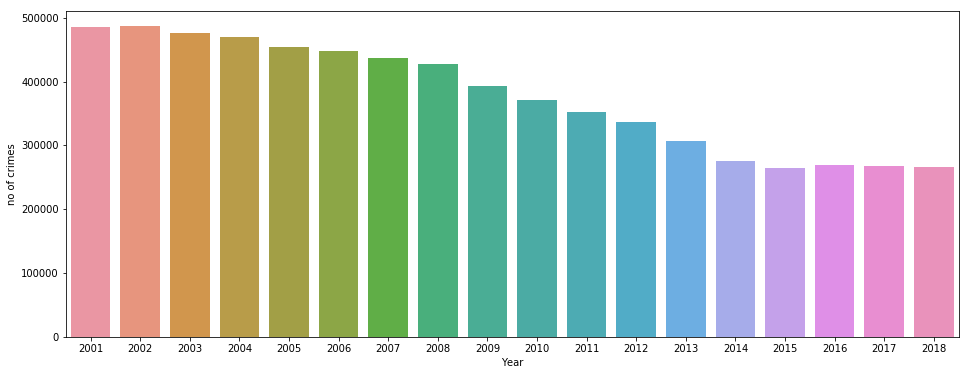

In [14]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Year',data=crime_df)
plt.ylabel("no of crimes")

plt.show()

crimes trend for month wise 

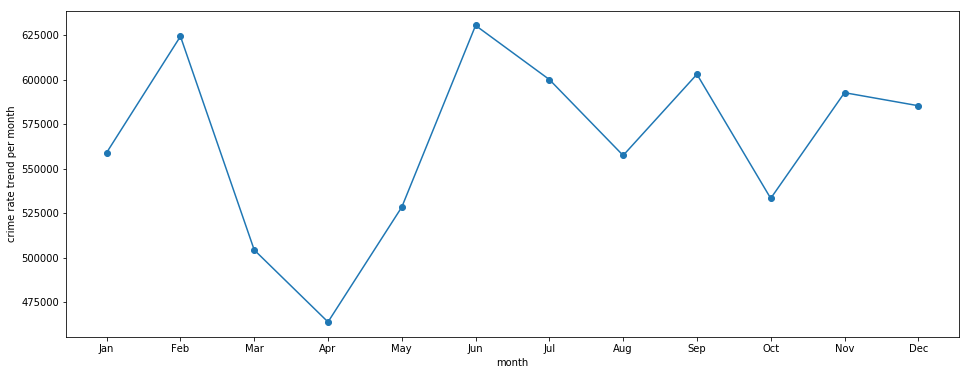

In [15]:
plt.figure(figsize=(16, 6))
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crime_df.groupby('month')['ID'].count().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel("crime rate trend per month")
plt.show()

comparing crimes month wise for each year

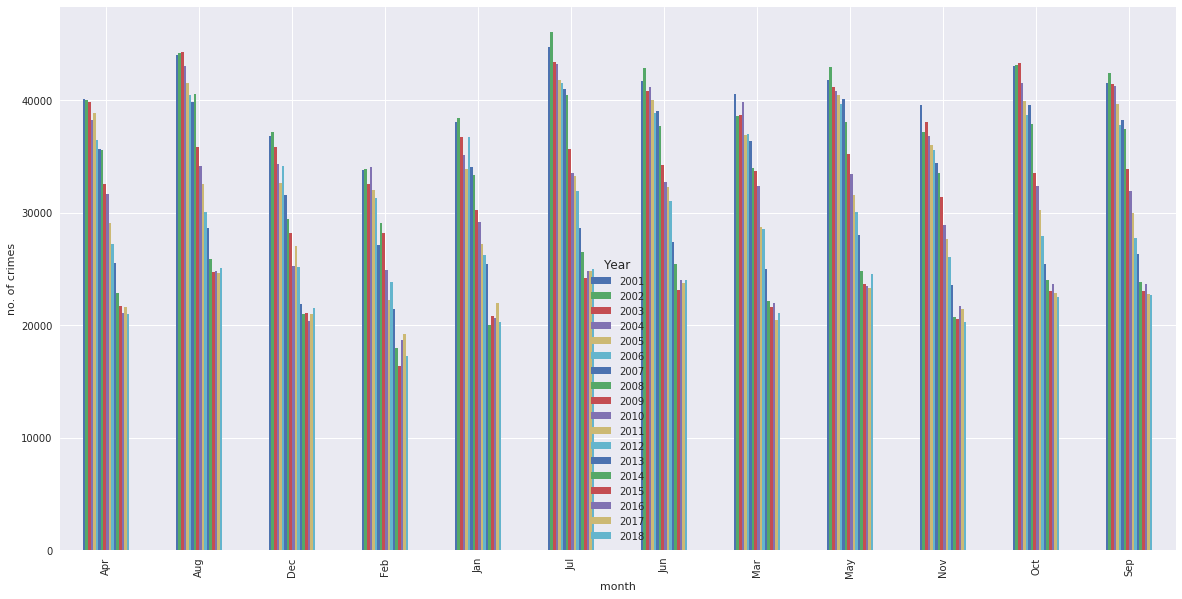

In [48]:
sns.set(rc={'figure.figsize':(20,10)})
#crime_monthwise=crime_df.groupby(['month','Year'])['ID'].count()
#print(crime_monthwise)
crime_df.groupby(['month','Year'])['ID'].count().unstack().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel("no. of crimes")
plt.show()


 

week wise crime trend

In [22]:
crime_df.groupby(['weekday']).size()

weekday
Friday       1021402
Monday        957221
Saturday      969554
Sunday        916589
Thursday      968428
Tuesday       971772
Wednesday     978018
dtype: int64

order crime types based on frequency  

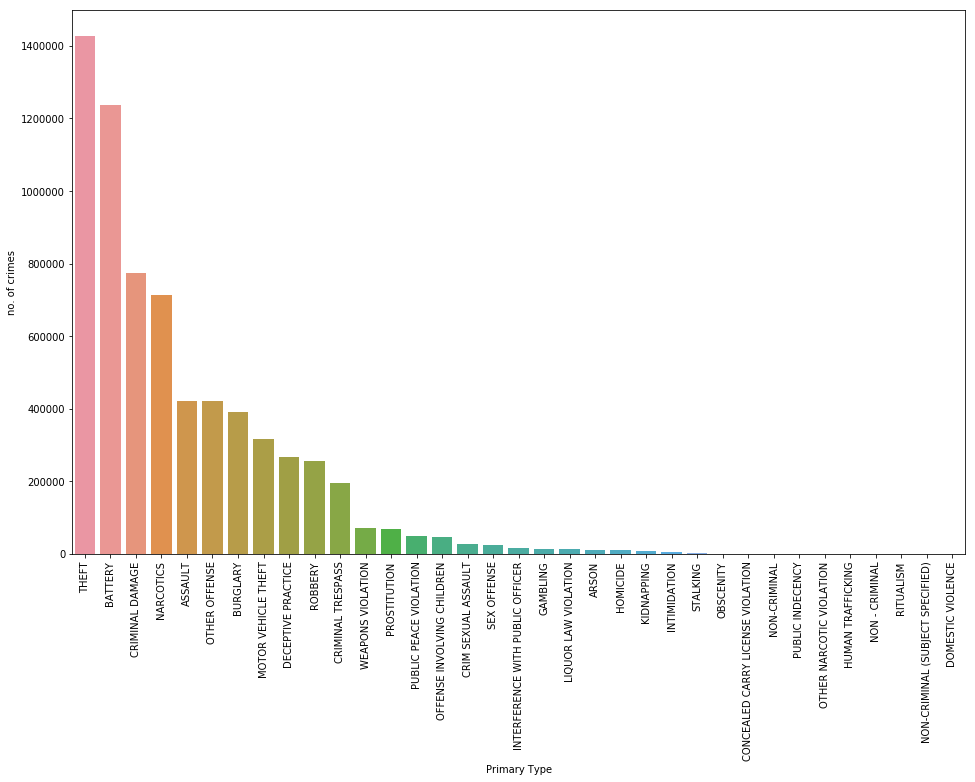

In [24]:
plt.figure(figsize=(16,10))
sns.countplot(x='Primary Type',data=crime_df,order=crime_df['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('no. of crimes')
plt.show()

order crimes based on location

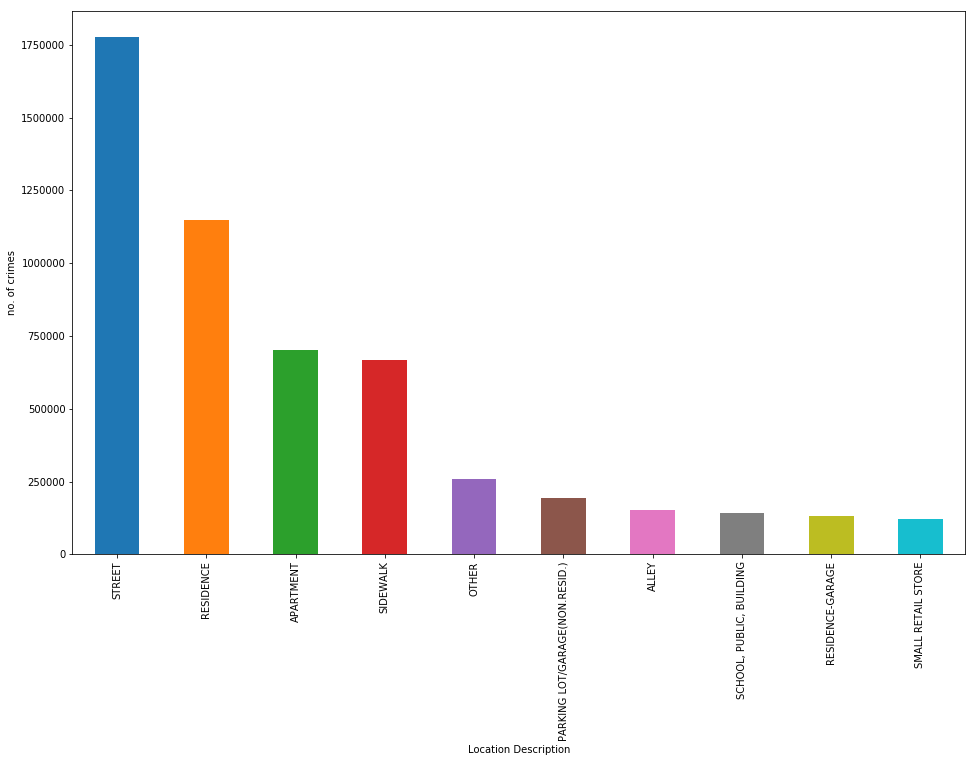

In [33]:
plt.figure(figsize=(16,10))
crime_loc=crime_df.groupby('Location Description')['ID'].count().sort_values(ascending=False)
##get top 10 crime locations
crime_loc=crime_loc[:10]
crime_loc.plot(kind='bar')
plt.ylabel("no. of crimes")
plt.show()


checking arrest frequency for crimes 

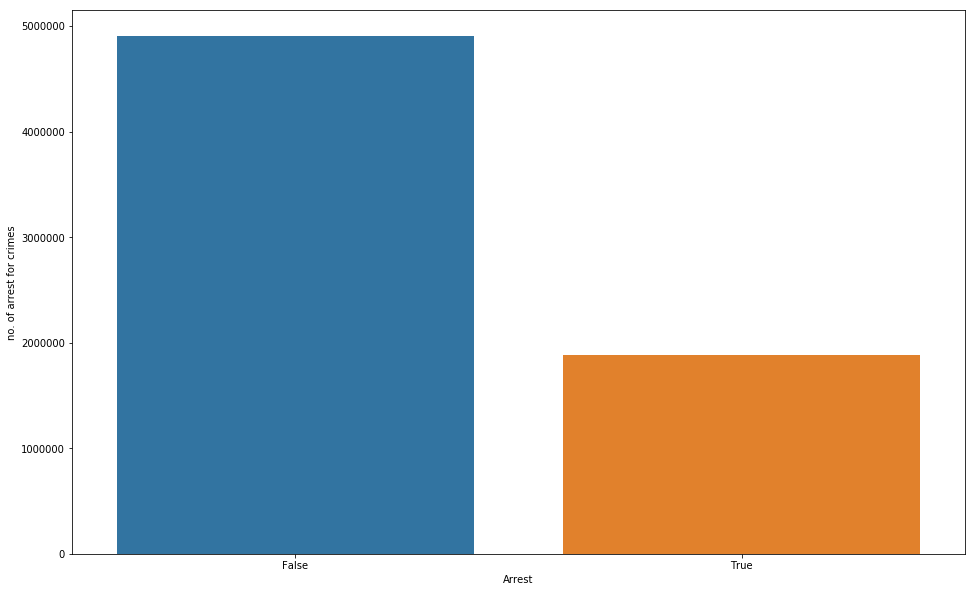

In [34]:
plt.figure(figsize=(16,10))
sns.countplot(x='Arrest',data=crime_df)
plt.ylabel("no. of arrest for crimes")
plt.show()

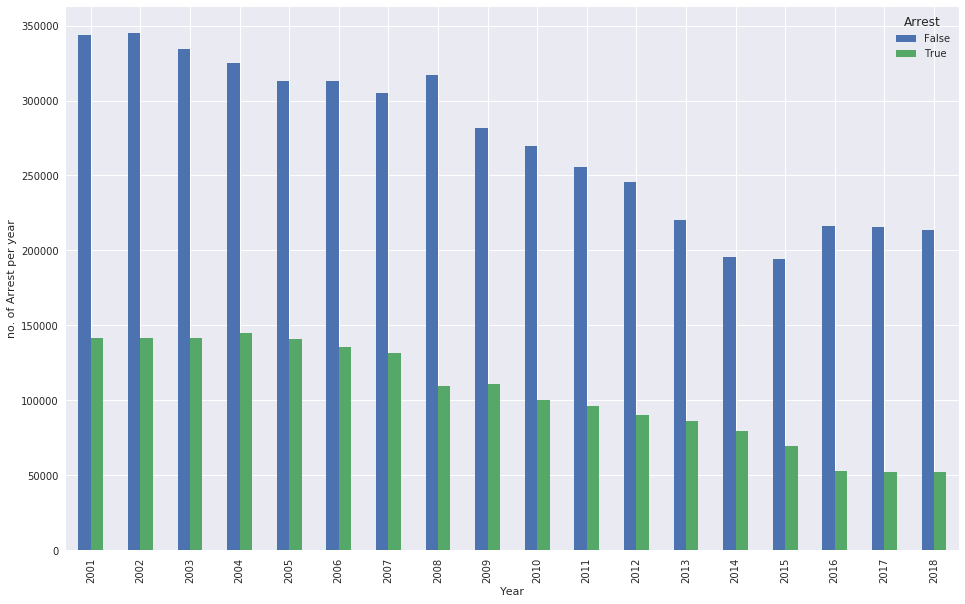

In [44]:
#plt.figure(figsize=(16,10))
sns.set(rc={'figure.figsize':(16,10)})
crime_df.groupby(['Year','Arrest'])['ID'].count().unstack().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel("no. of Arrest per year")
plt.show()

arrests per crime wise 

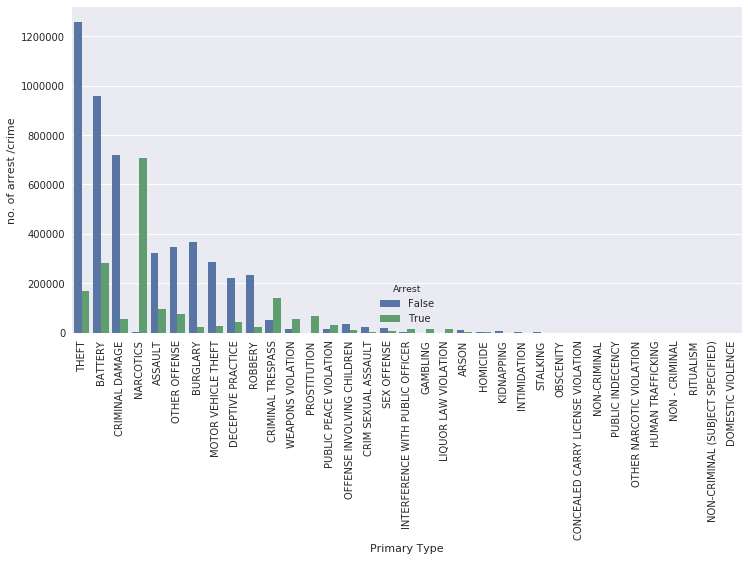

In [49]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Primary Type',hue='Arrest',data=crime_df,order=crime_df['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('no. of arrest /crime')
plt.show()

Analyse top 5 crimes (due to data size , just considering top 5 crimes)

In [12]:
top_5crime=crime_df[(crime_df['Primary Type']=='THEFT')|(crime_df['Primary Type']=='BATTERY') | (crime_df['Primary Type']=='CRIMINAL DAMAGE') | (crime_df['Primary Type']=='NARCOTICS')|(crime_df['Primary Type']=='ASSAULT')]

In [56]:
top_5crime_table=top_5crime.pivot_table(values='ID',index='month',columns='Year',aggfunc=np.size)
top_5crime_table

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
Apr,27739,27179,27444,26175,26788,25339,24610,24418,22142,21610,19299,18620,17501,15493,14589,13976,14034,13763
Aug,30341,30247,30710,30071,28312,27815,27280,27643,24243,22979,21643,20047,19733,17533,16623,16182,16298,16681
Dec,24791,24889,23875,22694,21314,23042,21000,19178,18037,15862,17590,16542,14393,13755,13738,12453,13367,14217
Feb,22771,22706,21978,23022,21653,20999,18264,19574,19021,16925,14711,16103,13928,12165,10697,12128,12104,11104
Jan,25194,25368,24163,23069,22058,24441,22736,22178,19773,18844,17335,17246,16227,12833,13418,12955,13297,12848
Jul,30747,31991,30296,30354,28852,28780,28602,27513,24241,22817,22550,21809,19835,18184,16310,16450,16353,16797
Jun,28940,29937,28283,28618,27414,26735,26966,26214,23260,22208,21543,21335,19018,17252,15482,15939,15741,16178
Mar,27725,26233,26271,27242,24865,25194,25177,23110,22892,22178,19205,19756,16929,14729,14541,14585,13207,13929
May,29001,29877,28498,28090,28006,27241,27751,26252,24186,22692,20839,20569,19293,17029,16083,15675,15383,16572


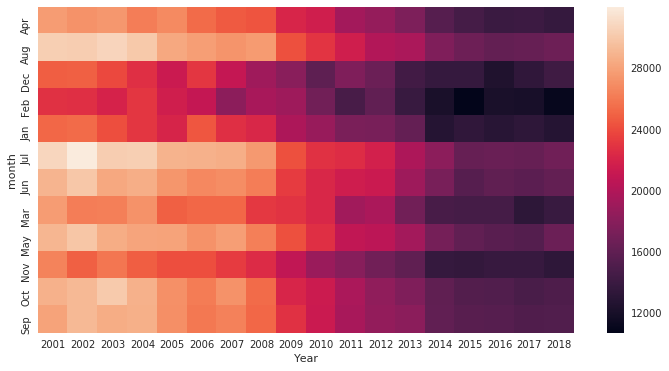

In [57]:
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(top_5crime_table)
plt.show()

from heatmap may,june,july, august,october have hight crime rates

plotting graph for the top 5 crimes 

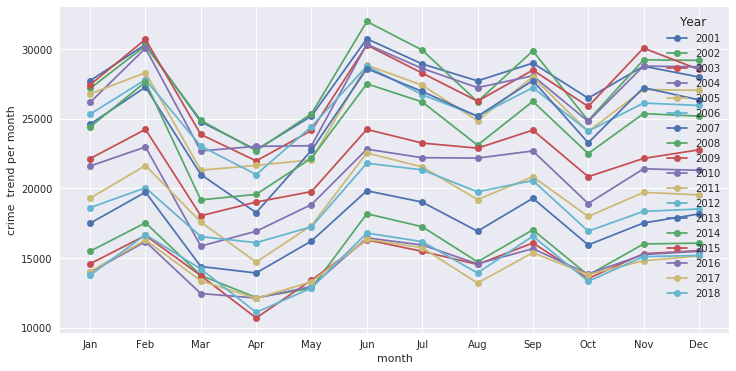

In [58]:
sns.set(rc={'figure.figsize':(12,6)})
top_5crime.groupby(['month','Year'])['ID'].count().unstack().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel("crime  trend per month")
plt.show()

bit messy due to number of years 

check for hour wise crime 

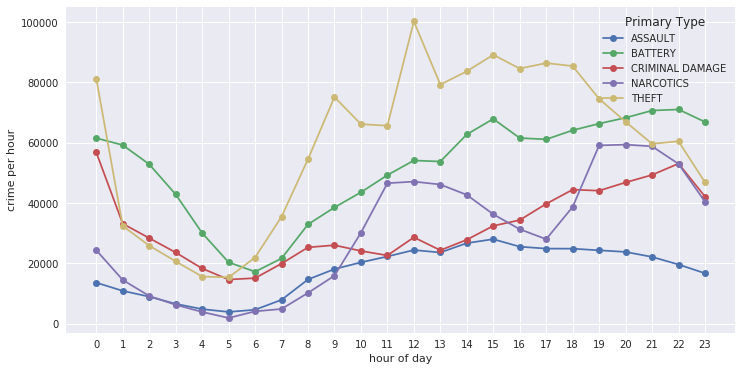

In [60]:
sns.set(rc={'figure.figsize':(12,6)})
top_5crime.groupby([top_5crime['Date'].dt.hour,'Primary Type'])['ID'].count().unstack().plot(marker='o')
plt.xticks(np.arange(24))
plt.xlabel("hour of day")
plt.ylabel("crime per hour")
plt.show()


from the above plot , crime rate is low from 1 AM 6 AM , then the crime rate increases

check for top locations where top 5 crimes occured frequently

In [13]:
top_10locations=list(top_5crime['Location Description'].value_counts()[:10].index)

In [62]:
top_10locations

['STREET',
 'RESIDENCE',
 'SIDEWALK',
 'APARTMENT',
 'OTHER',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'SCHOOL, PUBLIC, BUILDING',
 'ALLEY',
 'RESIDENCE PORCH/HALLWAY',
 'SMALL RETAIL STORE']

In [14]:
top_5crime['Location Description']=np.where(top_5crime['Location Description'].isin(top_10locations),top_5crime['Location Description'],'OTHER')

/home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
 topcrime_locations=top_5crime.pivot_table(values='ID',index='Location Description',columns='Primary Type',aggfunc=np.size)

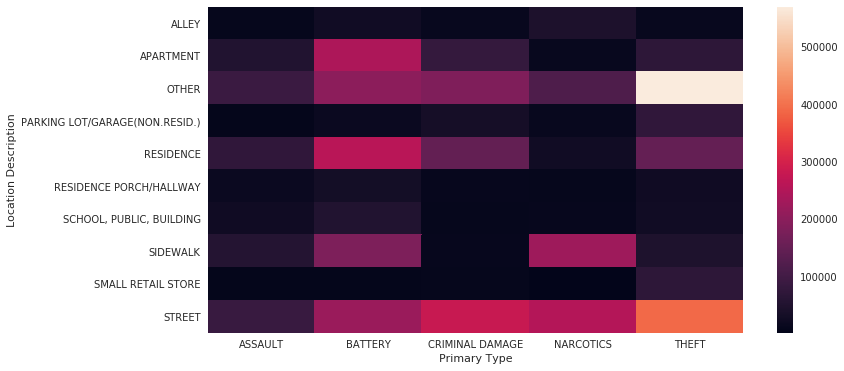

In [75]:
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(topcrime_locations)
plt.show()

crimes per weekday heatmap 

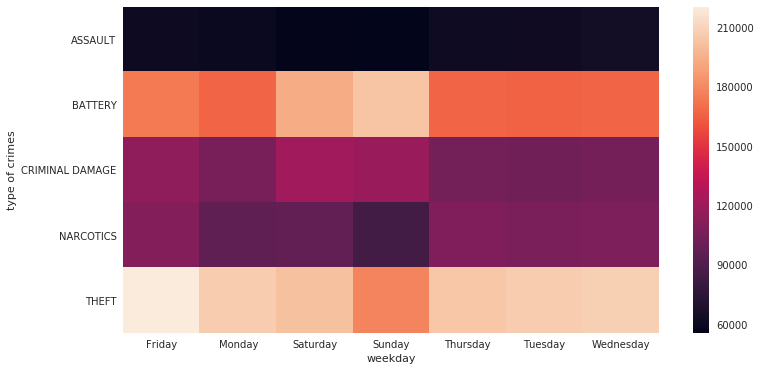

In [79]:
topcrime_weekday=top_5crime.pivot_table(values='ID',index='Primary Type',columns='weekday',aggfunc=np.size)
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(topcrime_weekday)
plt.ylabel('type of crimes')
plt.show()

from EDA part , it is clear that crime trend is higher during summer and from 1 am to 6 am crime is less .
top 5 crimes are , ASSAULT ,BATTERY, CRIMINAL DAMAGE,NARCOTICS,THEFT.
Top crime locations are  - STREET,SMALL RETAIL STORE, SIDEWALK,SCHOOL,PUBLIC BUILDING,RESIDENCE PORCH/HALLWAY,RESIDENCE,PARKING LOT/GARAGE,APARTMENT,ALLEY.

THEFT is higher on weekdays and criminal damage is higher on weekends 

overall crime rate is falling from previous years. 


In [82]:
top_5crime['Primary Type'].unique()

array(['BATTERY', 'NARCOTICS', 'CRIMINAL DAMAGE', 'THEFT', 'ASSAULT'],
      dtype=object)

In [84]:
top_5crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'month', 'weekday'],
      dtype='object')

In [90]:
top_5crime.isnull().sum(axis = 0)

ID                           0
Case Number                  3
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                    19
Ward                    419847
Community Area          419138
FBI Code                     0
X Coordinate             35730
Y Coordinate             35730
Year                         0
Updated On                   0
Latitude                 35730
Longitude                35730
Location                 35730
month                        0
weekday                      0
dtype: int64

Do preprocessing and impute missing values for important features and drop the corelated features 

do the feature engineering for location .

1. Usecase - classification of crimes (consider 5 top crimes) based on data available 

In [91]:
top_5crime_bkup=top_5crime.copy()

In [15]:
top_5crime=top_5crime.drop(['Ward','Community Area','X Coordinate','Y Coordinate','Location'],axis=1)

In [16]:
top_5crime.isnull().sum(axis=0)

ID                          0
Case Number                 3
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                   19
FBI Code                    0
Year                        0
Updated On                  0
Latitude                35730
Longitude               35730
month                       0
weekday                     0
dtype: int64

impute missing values using KNN 

In [96]:
top_5crime.shape

(4574099, 19)

In [17]:
top_5crime['hour'] = top_5crime.Date.apply(lambda x: x.hour)

In [18]:
top_5crime=top_5crime.drop(['ID','Case Number','Date','Updated On'],axis=1)

In [20]:
top_5crime.head(3)

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Latitude,Longitude,month,weekday,hour
0,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,04B,2015,41.891399,-87.744385,Mar,Wednesday,19
2,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,08B,2015,41.813861,-87.596643,Mar,Wednesday,22
3,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,2.0,08B,2015,41.800802,-87.622619,Mar,Wednesday,22


impute missing district using location description and FBI code

In [117]:
impute_district=top_5crime[['Location Description','District','FBI Code']].copy()

as these are categorical features , changing them to one hot encoded values

In [123]:
one_hot=pd.get_dummies(impute_district['Location Description'])

In [124]:
one_hot1=pd.get_dummies(impute_district['FBI Code'])

In [130]:
impute_district= impute_district.drop(['Location Description','FBI Code'],axis = 1)
# Join the encoded dataframes 
impute_district = impute_district.join(one_hot)

In [132]:
impute_district = impute_district.join(one_hot1)

In [135]:
impute_district.head(2)

,District,ALLEY,APARTMENT,OTHER,PARKING LOT/GARAGE(NON.RESID.),RESIDENCE,RESIDENCE PORCH/HALLWAY,"SCHOOL, PUBLIC, BUILDING",SIDEWALK,SMALL RETAIL STORE,STREET,04A,04B,06,08A,08B,14,18,26
0,11.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
#from fancyimpute import KNN

#impute_district=KNN(k=3).fit_transform(impute_district)
#dropping those Nan values 

as above i am getting memory error , bcz of memory issue on my local system ,i am dropping those 35,730  null value records in latitude and longitude and  the 19 null records districts

In [20]:
top_5crime=top_5crime.dropna()

In [21]:
 top_5crime.shape

(4538350, 16)

In [22]:
top_5crime.isnull().sum(axis=0)

Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
month                   0
weekday                 0
hour                    0
dtype: int64

In [23]:
#droping crime description 
top_5crime=top_5crime.drop(['Description'],axis=1)

Now we will use H2O machine learning for classifying crimes from other features available , using H2O here as H2O will
take care of converting categorical features to numerics and does the scaling of continous features , instead of we do
it manually by one hot encoding for categorical and scaling / normalizing for continous features 

In [24]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
from __future__ import print_function
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_191"; OpenJDK Runtime Environment (build 1.8.0_191-8u191-b12-2ubuntu0.16.04.1-b12); OpenJDK 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from /home/chandrakantachaudhury/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9ltu9ks4
  JVM stdout: /tmp/tmp9ltu9ks4/h2o_chandrakantachaudhury_started_from_python.out
  JVM stderr: /tmp/tmp9ltu9ks4/h2o_chandrakantachaudhury_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.1
H2O cluster version age:,1 month and 13 days
H2O cluster name:,H2O_from_python_chandrakantachaudhury_w6aisr
H2O cluster total nodes:,1
H2O cluster free memory:,3.434 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


 split train and test (80 %, 20 %)

In [25]:
 
h2oframe = h2o.H2OFrame(top_5crime)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [26]:
train, test = h2oframe.split_frame(ratios=[0.7])

In [28]:
xgbm_model = H2OXGBoostEstimator(keep_cross_validation_fold_assignment = True,nfolds =10,seed=1234,keep_cross_validation_predictions=True)
xgbm_model.train(y="Primary Type", x=["Block", "IUCR", "Location Description", "Arrest","Domestic","Beat",
                                      "District","FBI Code","Year","Latitude","Longitude","month","weekday","hour"], training_frame=train)



xgboost Model Build progress: |██████████████████████████████████████████ (cancelled) 100%


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_8215d536390df0b4960bf31286e94612> was cancelled by the user.

In [156]:
gbm_model = H2OGradientBoostingEstimator(keep_cross_validation_fold_assignment = True,nfolds =10,seed=1234,keep_cross_validation_predictions=True)
gbm_model.train(y="Primary Type", x=["Block", "IUCR", "Location Description", "Arrest","Domestic","Beat",
                                      "District","FBI Code","Year","Latitude","Longitude","month","weekday","hour"], training_frame=train)



gbm Model Build progress: |███████████████████████████████████████████████ (cancelled) 100%


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_8a6911455233eb5860b59accee804cae> was cancelled by the user.

In [160]:
rf_model = H2ORandomForestEstimator(keep_cross_validation_fold_assignment = True,nfolds=10,seed=1234,keep_cross_validation_predictions=True)
rf_model.train(y="Primary Type", x=["Block", "IUCR", "Location Description", "Arrest","Domestic","Beat",
                                      "District","FBI Code","Year","Latitude","Longitude","month","weekday","hour"], training_frame=train)

drf Model Build progress: |██████████████████████████████████████████████ (cancelled)  98%


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_9f766a96c22a0e2ca4ab83a91df74f31> was cancelled by the user.

In [ ]:
ensemble = H2OStackedEnsembleEstimator(model_id="chicagocrime_ensemble1",
                                       base_models=[xgbm_model, gbm_model,rf_model])

In [ ]:
ensemble.train(y="Primary Type", x=["Block", "IUCR", "Location Description", "Arrest","Domestic","Beat",
                                      "District","FBI Code","Year","Latitude","Longitude","month","weekday","hour"], training_frame=train)

In [ ]:
ensemble.predict(test) 
ensemble


ensemble.model_performance(test)

In [32]:
top_5crime.to_csv("top_5crime.csv",index=False)